In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
p = np.array([0.0, 0.1, 0.1, 0.3, 0.5, 0.7, 0.9])
n = np.zeros(p.shape)
np.random.shuffle(p)
p

array([0.1, 0.5, 0.7, 0.1, 0. , 0.9, 0.3])

In [54]:
class UCB:
    def __init__(self, p, T) -> None:
        self.p = p.copy()
        self.totalN = 0
        self.n = np.zeros(self.p.shape)
        self.picked = np.zeros(self.p.shape)
        self.T = T

    def NextAct(self):
        # 获取下一个动作
        unk = np.sqrt(np.log(self.totalN+1)/(2*self.n+1))
        sp = unk+self.picked/(self.n+1)
        return np.where(sp == np.max(sp))[0][0]

    def Reward(self, act):
        # 随机出该动作的回报
        if self.p[act] > np.random.rand():
            return 1
        else:
            return 0

    def update(self):
        # 迭代过程
        tmpT = self.T
        dQ = [0]
        Q = 0
        while tmpT > 0:
            tmpT -= 1
            act = self.NextAct()
            Q -= self.p[act]-np.max(self.p)
            dQ.append(Q)
            self.n[act] += 1
            self.totalN += 1
            self.picked[act] += self.Reward(act)
        return dQ

In [55]:
line = UCB(p, 20000).update()
line

[0,
 0.8,
 1.2000000000000002,
 1.4000000000000004,
 1.6000000000000005,
 2.4000000000000004,
 3.3000000000000003,
 3.3000000000000003,
 3.9000000000000004,
 3.9000000000000004,
 4.1000000000000005,
 4.1000000000000005,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.300000000000001,
 4.500000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 4.700000000000001,
 5.500000000000001,
 5.900000000000001,
 6.300000000000002,
 6.700000000000002,
 7.500000000000002,
 8.400000000000002,
 9.000000000000002,
 9.000000000000002,


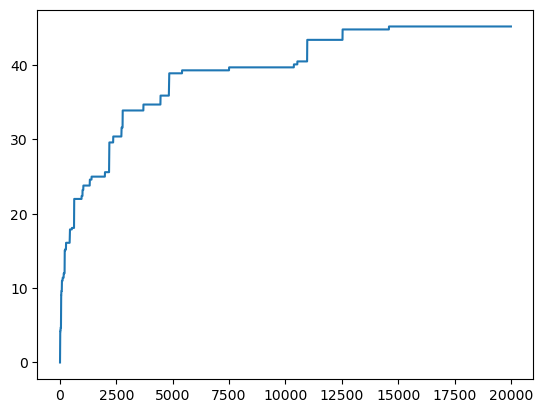

In [56]:
plt.plot(line)